About Iris dataset

The iris dataset contains the following data

    50 samples of 3 different species of iris (150 samples total)
    Measurements: sepal length, sepal width, petal length, petal width
    The format for the data: (sepal length, sepal width, petal length, petal width

In [14]:
#import necessary module
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
iris = pd.read_csv("IRIS.csv")

In [4]:
#check the data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [6]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#check if there is any missing value
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


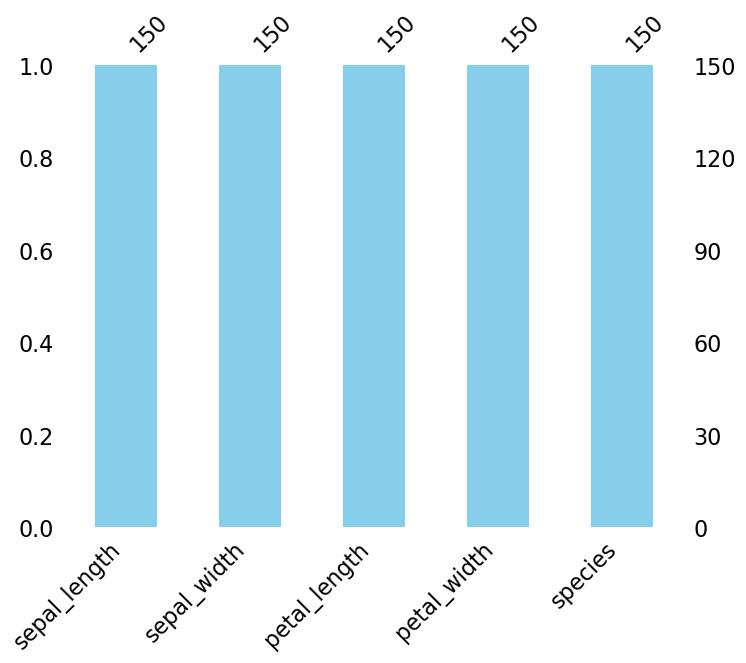

In [15]:

msno.bar(iris,figsize=(8,6),color='skyblue')
plt.show()

C:\Users\mahfuztbt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


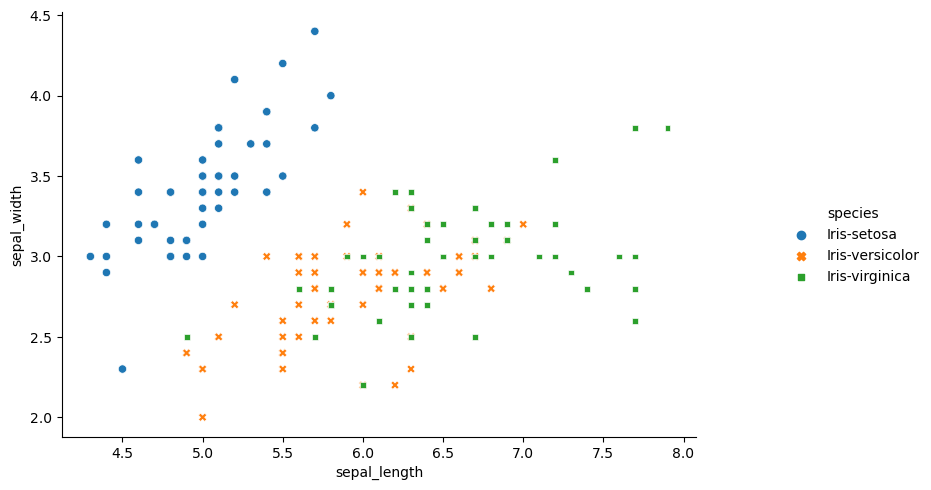

In [19]:
#data visulazation
g=sns.relplot(x='sepal_length',y='sepal_width',data=iris,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

C:\Users\mahfuztbt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


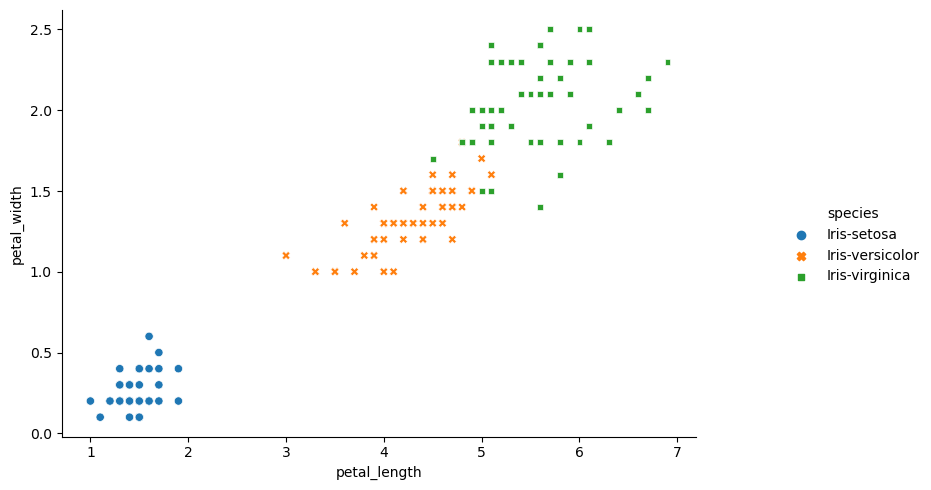

In [21]:
g=sns.relplot(x='petal_length',y='petal_width',data=iris,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

C:\Users\mahfuztbt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


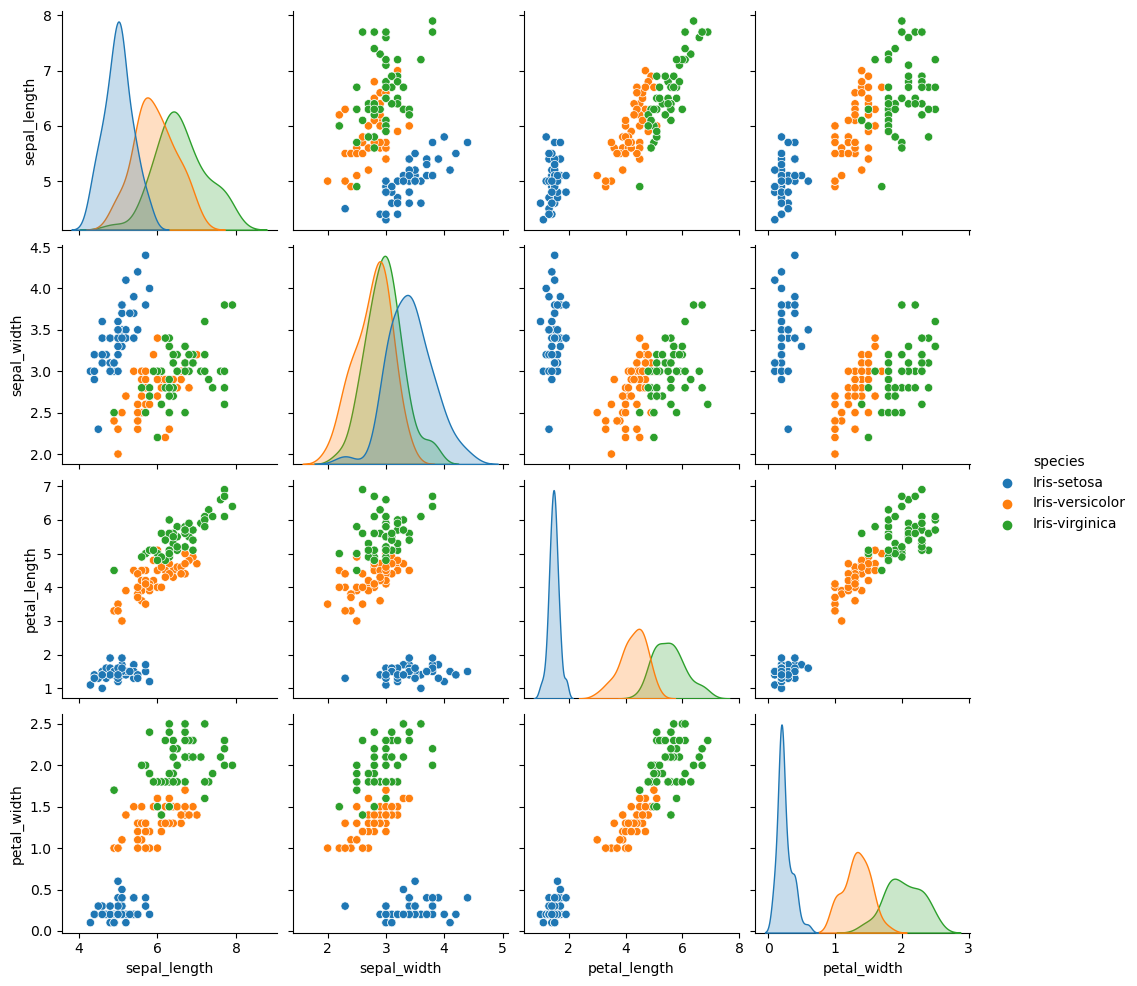

In [22]:
sns.pairplot(iris,hue="species")
plt.show() #Pair Plots

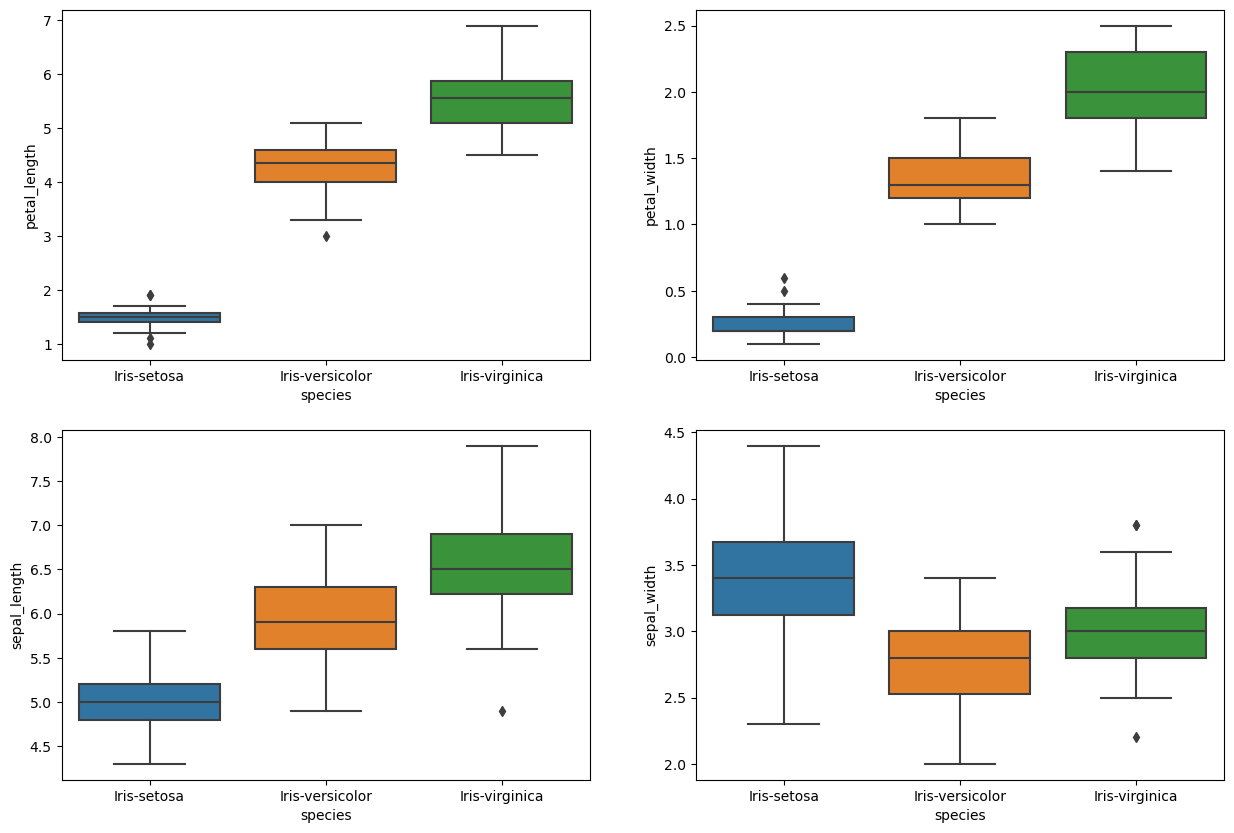

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.show()  #boxplot 

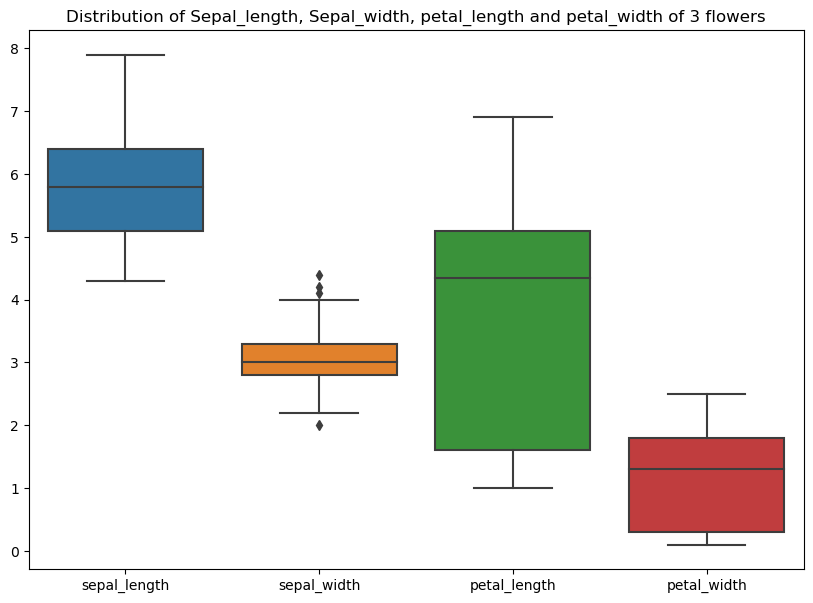

In [26]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=iris).set_title("Distribution of Sepal_length, Sepal_width, petal_length and petal_width of 3 flowers")
plt.show()

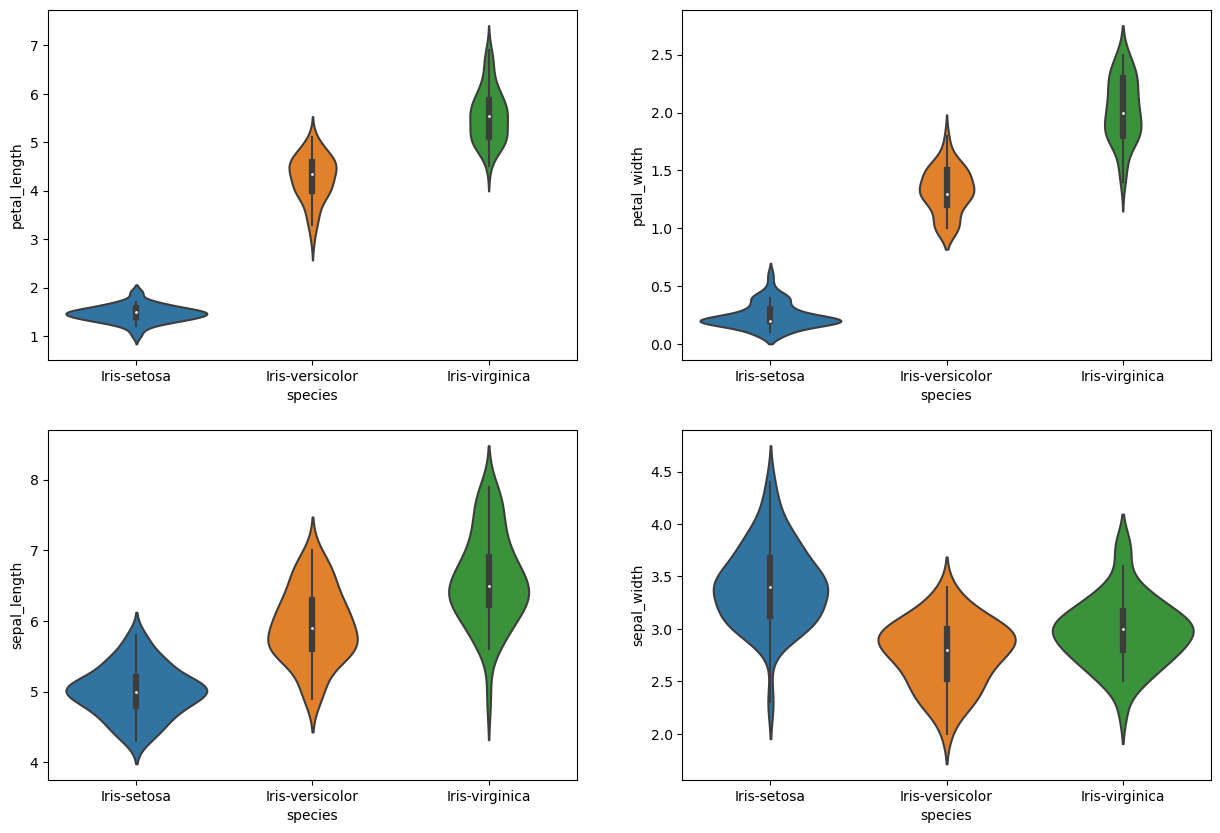

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)
plt.show()  #Violin Plot 

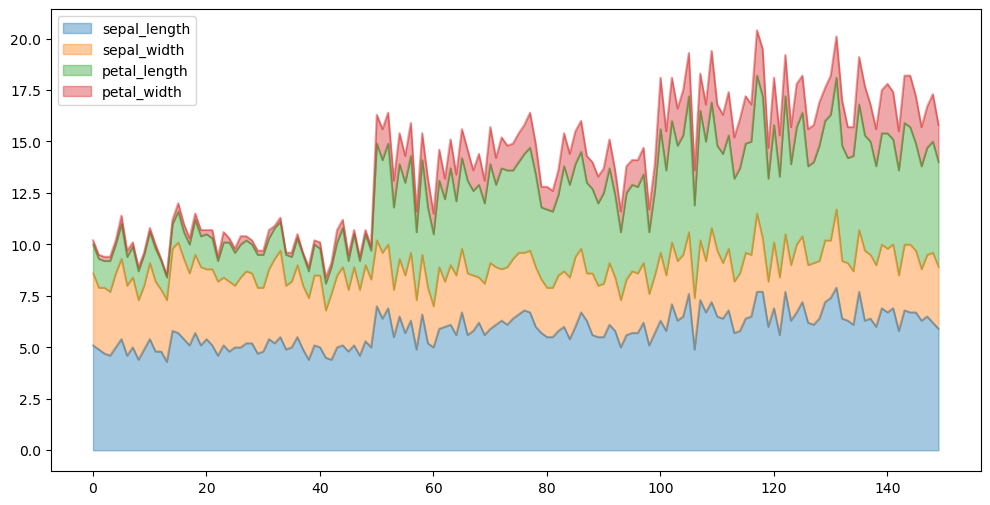

In [28]:


iris.plot.area(y=['sepal_length','sepal_width','petal_length','petal_width'],alpha=0.4,figsize=(12, 6));
#Area Plot


####  dataset contain six columns: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. The actual features are described by columns 1-4. Last column contains labels of samples. Firstly we need to split data into two arrays: X (features) and y (labels).

In [33]:
#dividing into features and label
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

#### As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [73]:
#spiting the data into train and tesing dataset 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=100,random_state=2)

In [74]:
#now we can train our model then we can compare with different model

In [75]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')


print('Confusion matrix for Naive Bayes\n',cm)
print('Accuracy of Naive Bayes: %.7f' %accuracy)
print('Precision: %.2f' %precision)
print('recall: %.2f' %recall)
print('f1-score : %.2f' %f1)

Confusion matrix for Naive Bayes
 [[36  0  0]
 [ 0 30  1]
 [ 0  3 30]]
Accuracy of Naive Bayes: 0.9600000
Precision: 0.96
recall: 0.96
f1-score : 0.96


## so we can see we got the 100% accuracy for gaussian naive bayes, now lets check the other algorithm accuracy and then compoare whcih one is better

###  K Nearest Neighbor:
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
![](https://www.kdnuggets.com/wp-content/uploads/rapidminer-knn-image1.jpg)

In [76]:
# knn
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('Accuracy : %.5f' %accuracy)
print('precision : %.2f' %precision)
print('recall: %.2f' %recall)
print('f1-score: %.2f' %f1)

Confusion matrix for KNN
 [[36  0  0]
 [ 0 31  0]
 [ 0  4 29]]
Accuracy : 0.96000
precision : 0.96
recall: 0.96
f1-score: 0.96


###  Logistic Regression:
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.
![](https://miro.medium.com/max/570/1*50TdLe6f_AW8wnBBkyLYgw.png)

In [77]:
#logestic regression
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy: %.5f' %accuracy)
print('precision: %.2f' %precision)
print('recall: %.2f' %recall)
print('f1-score: %.2f' %f1)

Confusion matrix for Logistic Regression
 [[36  0  0]
 [ 0 30  1]
 [ 0  4 29]]
accuracy: 0.95000
precision: 0.95
recall: 0.95
f1-score: 0.95


###  Decision Tree:
A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.
![](https://miro.medium.com/max/1000/1*LMoJmXCsQlciGTEyoSN39g.jpeg)

In [78]:
# decision tree 
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.2f' %precision)
print('recall_DecisionTree: %.2f' %recall)
print('f1-score_DecisionTree : %.2f' %f1)

Confusion matrix for DecisionTree
 [[36  0  0]
 [ 0 30  1]
 [ 0  3 30]]
accuracy_DecisionTree: 0.960
precision_DecisionTree: 0.96
recall_DecisionTree: 0.96
f1-score_DecisionTree : 0.96


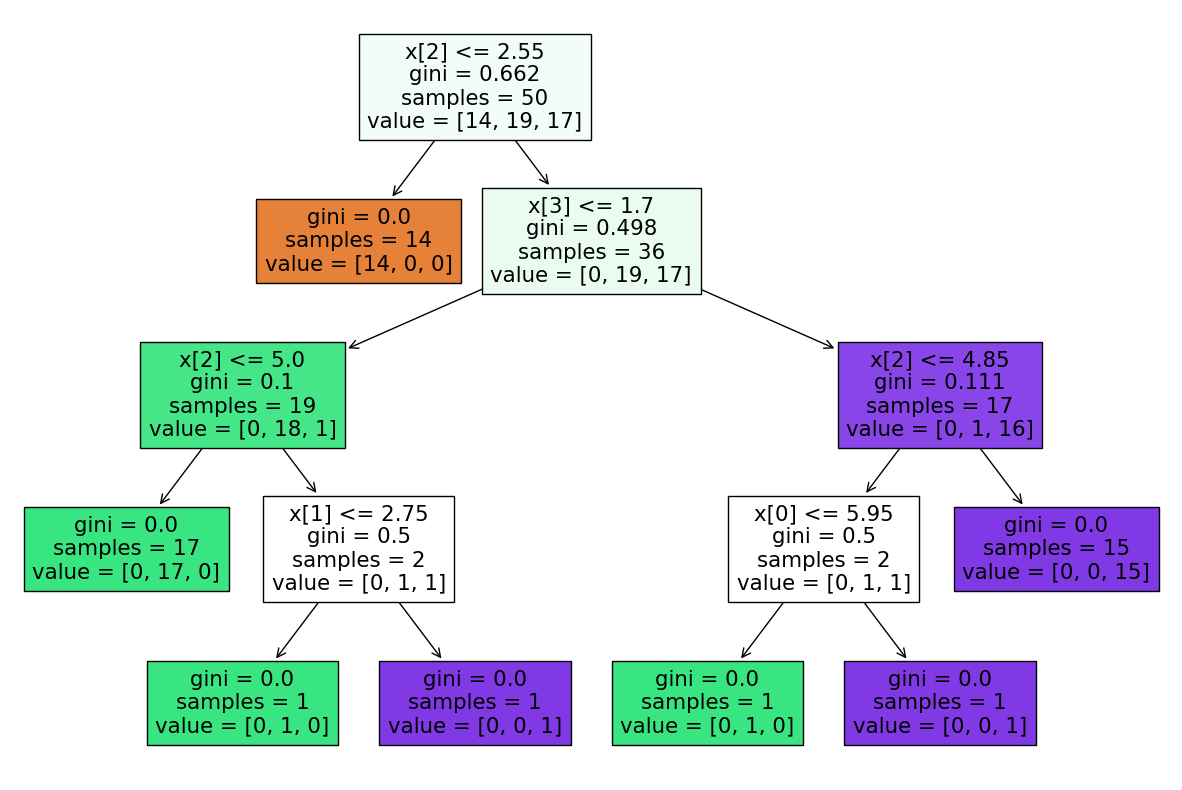

In [79]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()

### Linear Support Vector Machine:
Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well
![](https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2017/02/Margin.png)

In [80]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision: %.2f' %precision)
print('recall: %.2f' %recall)
print('f1-score : %.2f' %f1)

Confusion matrix for SVC
 [[36  0  0]
 [ 0 29  2]
 [ 0  3 30]]
accuracy_SVC: 0.950
precision: 0.95
recall: 0.95
f1-score : 0.95


C:\Users\mahfuztbt\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


###  Random Forest:
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.
![](https://miro.medium.com/max/1170/1*58f1CZ8M4il0OZYg2oRN4w.png)

In [81]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)


Confusion matrix for Random Forest
 [[36  0  0]
 [ 0 30  1]
 [ 0  2 31]]
accuracy_random_Forest : 0.970
precision_random_Forest : 0.970
recall_random_Forest : 0.970
f1-score_random_Forest : 0.970


In [82]:
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Logistic Regression', 
              'Random Forest',
              'Naive Bayes',  
              ' Support Vector Machine', 
              'Decision Tree'],
  
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Accuracy_score
0,Random Forest,97.0
1,KNN,96.0
2,Naive Bayes,96.0
3,Decision Tree,96.0
4,Logistic Regression,95.0
5,Support Vector Machine,95.0


# we can see g_naive bayes gives the best result. accuracy of 100%

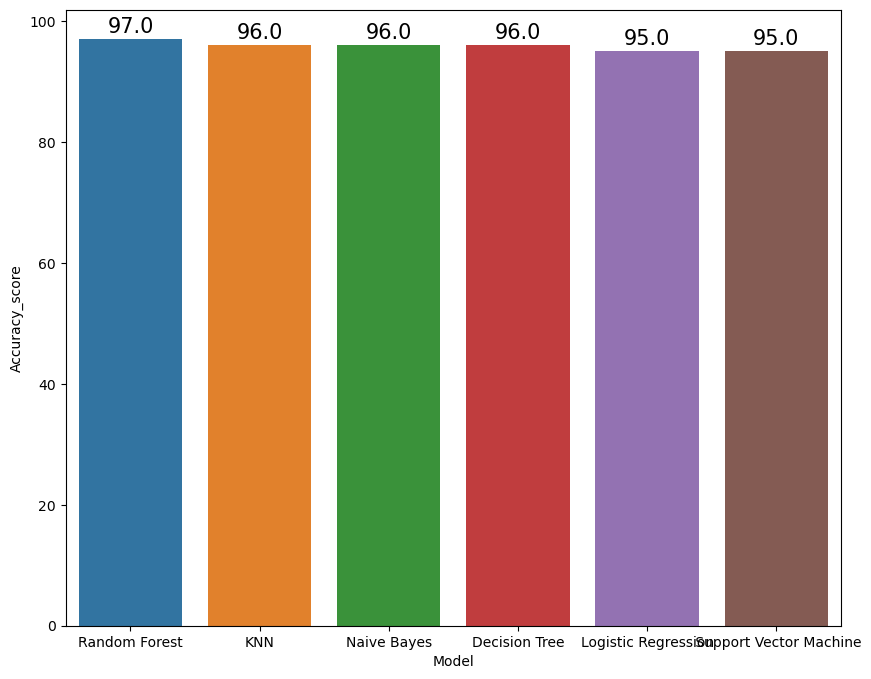

In [83]:
#  now let's make a barchart for better understaning the reuslt 
plt.subplots(figsize=(10,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')
    